**Context**\
Kumpulan data ini terkait dengan varian merah anggur Spanyol. Kumpulan data tersebut menjelaskan beberapa metrik popularitas dan deskripsi, pengaruhnya terhadap kualitasnya. Kumpulan data dapat digunakan untuk tugas klasifikasi atau regresi. Kelas-kelasnya teratur dan tidak seimbang (yaitu kualitasnya meningkat dari hampir 5 menjadi 4 poin). **Tugasnya adalah memprediksi harga anggur menggunakan data yang diberikan**.

**Content**\
Kumpulan data tersebut berisi 7.500 jenis anggur merah berbeda dari Spanyol dengan 11 fitur yang menjelaskan harga, peringkat, dan bahkan beberapa deskripsi rasa.

**Understanding**\
Dengan Dataset anggur ini kami akan membuat prediksi harga Anggur berdasarkan atribut **rating, region, type, body**.


**Technologies Used**
- Python: Bahasa pemrograman yang digunakan untuk menulis kode.
- Pandas: Library manipulasi data yang kuat yang digunakan untuk membaca dan memproses kumpulan data.
- NumPy : Library untuk komputasi numerik, digunakan untuk menangani nilai yang hilang dan pemrosesan awal data.
- Seaborn dan Matplotlib: Library visualisasi data yang digunakan untuk membuat Scatter-plot, Box-plot dan Heat-Map.
- Scikit-Learn: Machine Learning Library yang digunakan untuk pemilihan fitur, pemisahan data, dan prapemrosesan.


In [1]:
#Import library untuk data preparation dan visualization
# Importing numpy for numerical operations
import numpy as np
# Importing pandas for data manipulation
import pandas as pd
# Importing matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Importing statistics for statistical calculations
import statistics
# Importing ttest_ind from scipy.stats for independent t-test


In [2]:
# Load dataset
file_path = 'wines_SPA.csv'  # Sesuaikan path dengan file
data = pd.read_csv(file_path)

# Tampilkan beberapa baris data untuk memeriksa strukturnya
print(data.head())


          winery           wine  year  rating  num_reviews country  \
0  Teso La Monja          Tinto  2013     4.9           58  Espana   
1         Artadi  Vina El Pison  2018     4.9           31  Espana   
2   Vega Sicilia          Unico  2009     4.8         1793  Espana   
3   Vega Sicilia          Unico  1999     4.8         1705  Espana   
4   Vega Sicilia          Unico  1996     4.8         1309  Espana   

             region   price                  type  body  acidity  
0              Toro  995.00              Toro Red   5.0      3.0  
1    Vino de Espana  313.50           Tempranillo   4.0      2.0  
2  Ribera del Duero  324.95  Ribera Del Duero Red   5.0      3.0  
3  Ribera del Duero  692.96  Ribera Del Duero Red   5.0      3.0  
4  Ribera del Duero  778.06  Ribera Del Duero Red   5.0      3.0  


In [3]:
data


,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
7495,Contino,Reserva,2016,4.2,392,Espana,Rioja,19.98,Rioja Red,4.0,3.0
7496,Conreria d'Scala Dei,Les Brugueres,2018,4.2,390,Espana,Priorato,16.76,Priorat Red,4.0,3.0
7497,Mustiguillo,Finca Terrerazo,2017,4.2,390,Espana,El Terrerazo,24.45,Red,4.0,3.0
7498,Matarromera,Gran Reserva,2011,4.2,389,Espana,Ribera del Duero,64.50,Ribera Del Duero Red,5.0,3.0


In [4]:
# Pilih hanya kolom yang relevan untuk analisis
columns = ['rating', 'region', 'type', 'body', 'price', 'year']
data = data[columns]

# Periksa informasi dataset
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rating  7500 non-null   float64
 1   region  7500 non-null   object 
 2   type    6955 non-null   object 
 3   body    6331 non-null   float64
 4   price   7500 non-null   float64
 5   year    7498 non-null   object 
dtypes: float64(3), object(3)
memory usage: 351.7+ KB
None


In [5]:
data

,rating,region,type,body,price,year
0,4.9,Toro,Toro Red,5.0,995.00,2013
1,4.9,Vino de Espana,Tempranillo,4.0,313.50,2018
2,4.8,Ribera del Duero,Ribera Del Duero Red,5.0,324.95,2009
3,4.8,Ribera del Duero,Ribera Del Duero Red,5.0,692.96,1999
4,4.8,Ribera del Duero,Ribera Del Duero Red,5.0,778.06,1996
...,...,...,...,...,...,...
7495,4.2,Rioja,Rioja Red,4.0,19.98,2016
7496,4.2,Priorato,Priorat Red,4.0,16.76,2018
7497,4.2,El Terrerazo,Red,4.0,24.45,2017
7498,4.2,Ribera del Duero,Ribera Del Duero Red,5.0,64.50,2011


In [6]:
## cek duplicated data
data.duplicated().sum()

np.int64(5461)

In [7]:
# Menghapus duplikat baris dan mempertahankan baris terakhir dari setiap set duplikat
data = data.drop_duplicates(keep='last')



In [8]:
# Menampilkan jumlah baris
num_rows = data.shape[0]
print(f'Jumlah baris: {num_rows}')

Jumlah baris: 2039


In [9]:
# melihat persentase nilai null pada masing masing kolom dengan menggunakan looping
for column in data.columns:
    null_percentage = data[column].isnull().mean() * 100
    print(f"Persentase nilai null pada kolom {column}: {null_percentage:.2f}%")

Persentase nilai null pada kolom rating: 0.00%
Persentase nilai null pada kolom region: 0.00%
Persentase nilai null pada kolom type: 5.20%
Persentase nilai null pada kolom body: 13.29%
Persentase nilai null pada kolom price: 0.00%
Persentase nilai null pada kolom year: 0.10%


In [10]:
# imputation ( Imputasi adalah teknik untuk memperkirakan nilai yang hilang dalam dataset.
# Mode imputation
mode_value = data["year"].mode()[0]  # Ambil nilai pertama dari Series mode
data["year"].fillna(mode_value, inplace=True)

mode_value = data["type"].mode()[0]  # Ambil nilai pertama dari Series mode
data["type"].fillna(mode_value, inplace=True)

# Median Imputation
# Mengisi nilai hilang dengan mean yang dibulatkan
data['body'].fillna(round(data['body'].mean()), inplace=True)


data.update(data)


C:\Users\kayla\AppData\Local\Temp\ipykernel_9416\4129127331.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["year"].fillna(mode_value, inplace=True)
C:\Users\kayla\AppData\Local\Temp\ipykernel_9416\4129127331.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["year"].fillna(mode_value, inplace=True)
C:\Users\kayla\AppData\Local\

In [11]:
# melihat persentase nilai null pada masing masing kolom dengan menggunakan looping
for column in data.columns:
    null_percentage = data[column].isnull().mean() * 100
    print(f"Persentase nilai null pada kolom {column}: {null_percentage:.2f}%")

Persentase nilai null pada kolom rating: 0.00%
Persentase nilai null pada kolom region: 0.00%
Persentase nilai null pada kolom type: 0.00%
Persentase nilai null pada kolom body: 0.00%
Persentase nilai null pada kolom price: 0.00%
Persentase nilai null pada kolom year: 0.00%


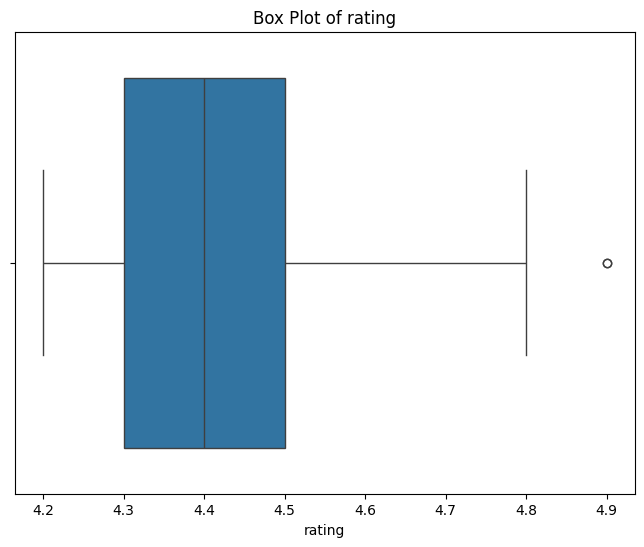

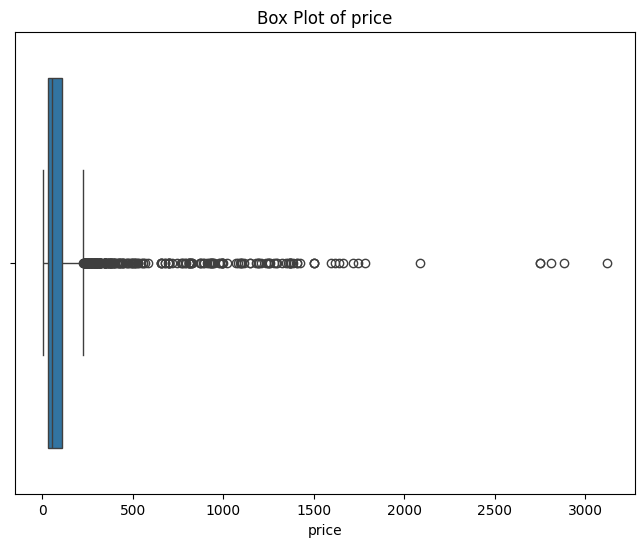

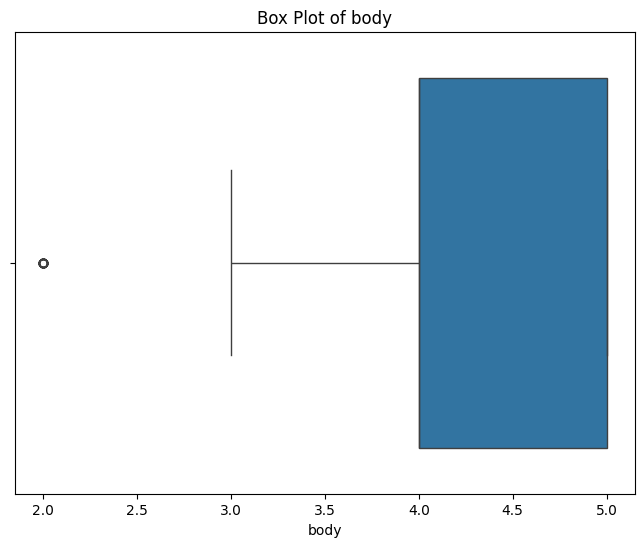

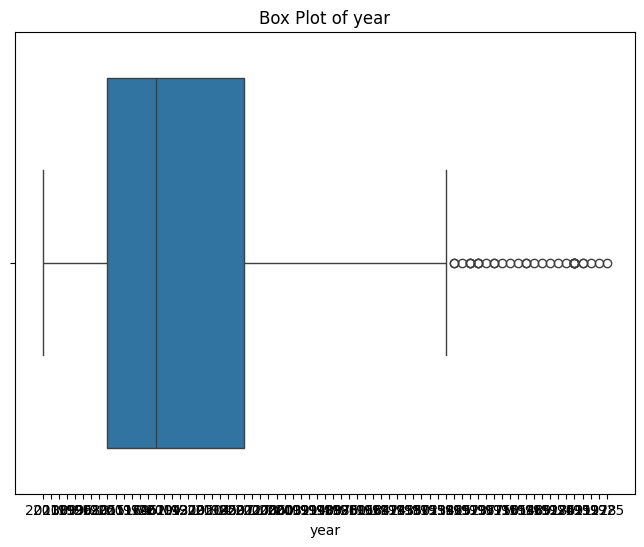

In [12]:


import matplotlib.pyplot as plt
import seaborn as sns

# Loop melalui setiap kolom numerik untuk membuat box plot
for column in ['rating', 'price', 'body', 'year']:
    plt.figure(figsize=(8, 6))  # Atur ukuran gambar
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()

In [13]:
# Menghitung jumlah baris di mana num_reviews > 1400
num_rows = data[data['price'] > 1400].shape[0]

print(f'Jumlah baris dengan price > 1400: {num_rows}')

Jumlah baris dengan price > 1400: 19


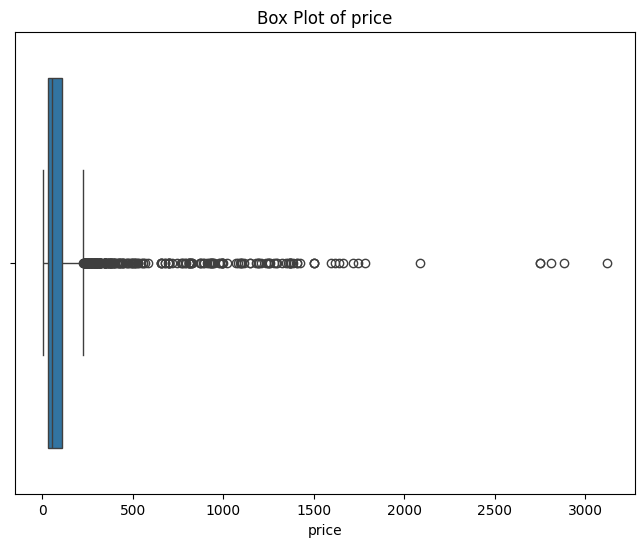

In [14]:


# Loop melalui setiap kolom numerik untuk membuat box plot
for column in ['price']:
    plt.figure(figsize=(8, 6))  # Atur ukuran gambar
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()

In [15]:
data.head()

,rating,region,type,body,price,year
0,4.9,Toro,Toro Red,5.0,995.00,2013
1,4.9,Vino de Espana,Tempranillo,4.0,313.50,2018
2,4.8,Ribera del Duero,Ribera Del Duero Red,5.0,324.95,2009
3,4.8,Ribera del Duero,Ribera Del Duero Red,5.0,692.96,1999
4,4.8,Ribera del Duero,Ribera Del Duero Red,5.0,778.06,1996


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2039 entries, 0 to 7499
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rating  2039 non-null   float64
 1   region  2039 non-null   object 
 2   type    2039 non-null   object 
 3   body    2039 non-null   float64
 4   price   2039 non-null   float64
 5   year    2039 non-null   object 
dtypes: float64(3), object(3)
memory usage: 111.5+ KB


In [17]:
# Data Transformation
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder

# kolom kategorikal yang akan di transformasi dengan menggunakan ordinalencoder
categorical_features = ['region', 'type','year']
# kolom numerikan yanng akan di transformasi dengan menggunakann MinMaxScaler
numerical_features = ['price', 'body', 'rating']

# Definisikan transformer
transformer = make_column_transformer(
    (OrdinalEncoder(), categorical_features), # proses ordinal encoder
    (MinMaxScaler(), numerical_features), # proses minmaxscaler
)

# Menerapkan transformasi dan menyimpan hasilnya
transformed_data = transformer.fit_transform(data)

# Mendapatkan nama kolom setelah Ordinalencoder dan Minmaxscaler
columns = categorical_features + numerical_features

# Mengubah hasil transformasi menjadi DataFrame
transformed_df = pd.DataFrame(transformed_data, columns=columns)

# cek hasil transformasi
print(transformed_df)

      region  type  year     price      body    rating
0       69.0  19.0  61.0  0.317913  1.000000  1.000000
1       74.0  18.0  66.0  0.099069  0.666667  1.000000
2       57.0  11.0  57.0  0.102746  1.000000  0.857143
3       57.0  11.0  47.0  0.220922  1.000000  0.857143
4       57.0  11.0  44.0  0.248249  1.000000  0.857143
...      ...   ...   ...       ...       ...       ...
2034    59.0  12.0  64.0  0.004814  0.666667  0.000000
2035    53.0   9.0  66.0  0.003780  0.666667  0.000000
2036    24.0  10.0  65.0  0.006249  0.666667  0.000000
2037    57.0  11.0  59.0  0.019110  1.000000  0.000000
2038    57.0  11.0  64.0  0.008555  1.000000  0.000000

[2039 rows x 6 columns]


In [18]:


# Data Transformation

# kolom kategorikal yang akan di transformasi dengan menggunakan ordinalencoder
categorical_features = ['region', 'type', 'year']
# kolom numerikan yanng akan di transformasi dengan menggunakann MinMaxScaler
numerical_features = ['price', 'body', 'rating']

# Definisikan transformer
transformer = make_column_transformer(
    (OrdinalEncoder(), categorical_features), # proses ordinal encoder
    (MinMaxScaler(), numerical_features), # proses minmaxscaler
)

# Menerapkan transformasi dan menyimpan hasilnya
transformed_data = transformer.fit_transform(data)

# Mendapatkan nama kolom setelah Ordinalencoder dan Minmaxscaler
columns = categorical_features + numerical_features

# Mengubah hasil transformasi menjadi DataFrame
transformed_df = pd.DataFrame(transformed_data, columns=columns)

# cek hasil transformasi
transformed_df

,region,type,year,price,body,rating
0,69.0,19.0,61.0,0.317913,1.000000,1.000000
1,74.0,18.0,66.0,0.099069,0.666667,1.000000
2,57.0,11.0,57.0,0.102746,1.000000,0.857143
3,57.0,11.0,47.0,0.220922,1.000000,0.857143
4,57.0,11.0,44.0,0.248249,1.000000,0.857143
...,...,...,...,...,...,...
2034,59.0,12.0,64.0,0.004814,0.666667,0.000000
2035,53.0,9.0,66.0,0.003780,0.666667,0.000000
2036,24.0,10.0,65.0,0.006249,0.666667,0.000000
2037,57.0,11.0,59.0,0.019110,1.000000,0.000000


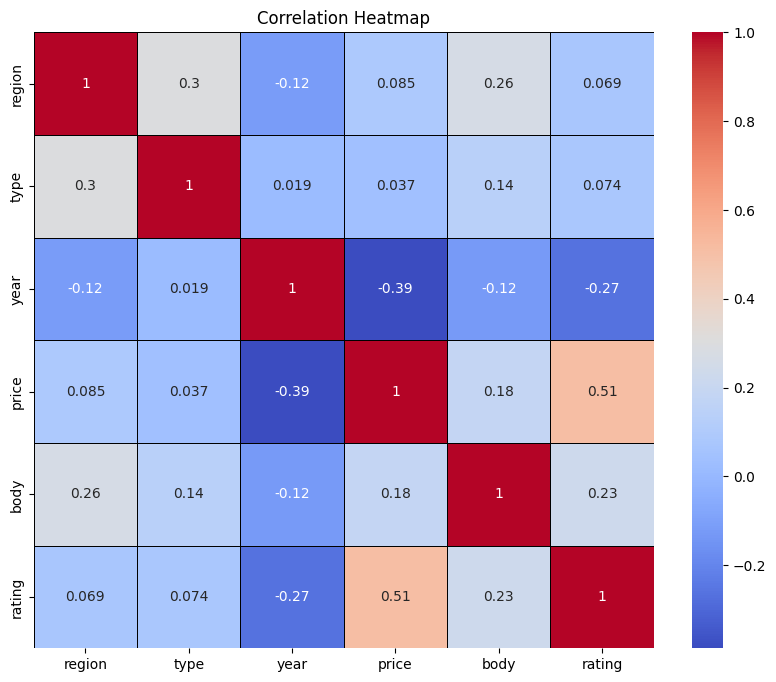

In [19]:
# Correlation Annalsis
# Hitung matriks korelasi dari DataFrame
corr_matrix = transformed_df.corr()

plt.figure(figsize=(10, 8))  # Menentukan ukuran gambar
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Correlation Heatmap')
plt.show()



In [20]:

# Memisahkan fitur independen (X) dan dependen (y)
X = transformed_df.drop('price', axis=1)  # Fitur independen (semua kolom kecuali 'price')
y = transformed_df['price']  # Fitur dependen ('price')

# Membagi data menjadi set pelatihan dan pengujian
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training dan 20% testing

# Menampilkan ukuran set pelatihan dan pengujian
print("Ukuran set pelatihan (X_train):", X_train.shape)
print("Ukuran set pengujian (X_test):", X_test.shape)
print("Ukuran set pelatihan (y_train):", y_train.shape)
print("Ukuran set pengujian (y_test):", y_test.shape)

Ukuran set pelatihan (X_train): (1631, 5)
Ukuran set pengujian (X_test): (408, 5)
Ukuran set pelatihan (y_train): (1631,)
Ukuran set pengujian (y_test): (408,)


In [21]:


from sklearn.ensemble import GradientBoostingRegressor

# Membuat instance dari RandomForestRegressor
model = GradientBoostingRegressor(random_state=42) # Anda dapat menyesuaikan parameter model di sini

# Melatih model dengan data pelatihan
model.fit(X_train, y_train)

# Membuat prediksi dengan data uji
y_pred = model.predict(X_test)

In [22]:


from sklearn.metrics import mean_squared_error, r2_score

# Menghitung MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Menghitung RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Menghitung R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 0.0060284017885367915
Root Mean Squared Error (RMSE): 0.07764278323538377
R-squared (R2): 0.2165230304239567


F1 Score: 0.0


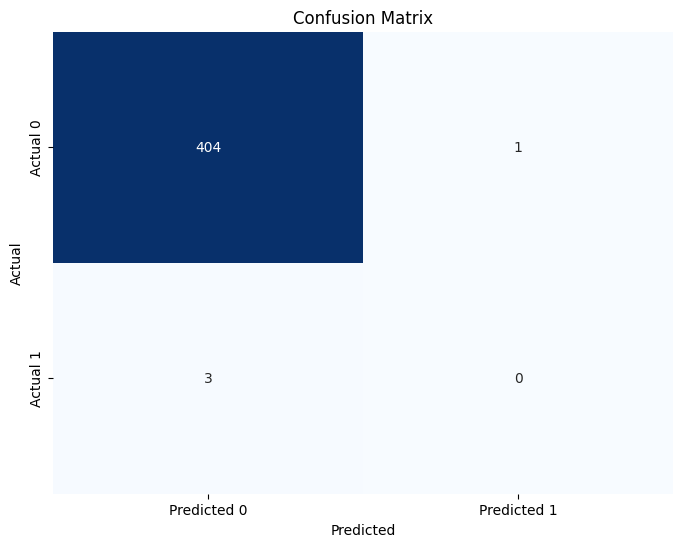

In [23]:


from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Assuming 'y_test' are continuous values, you need to discretize them for F1-score and confusion matrix
# Choose a threshold to binarize the 'y_test'
threshold = 0.5  # Example threshold, adjust based on your data

# Convert y_test and y_pred to binary classes (0 or 1)
y_test_bin = (y_test > threshold).astype(int)  # 1 if above threshold, 0 otherwise
y_pred_bin = (y_pred > threshold).astype(int)

# Calculate F1-score
f1 = f1_score(y_test_bin, y_pred_bin)
print(f"F1 Score: {f1}")

# Calculate confusion matrix
cm = confusion_matrix(y_test_bin, y_pred_bin)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ... (rest of your code) ...

In [24]:

# Create a DataFrame from the collected performance data
performance_df = pd.DataFrame(performances)

# Find the model with the lowest RMSE (best performance)
best_model_index = performance_df['RMSE'].idxmin()
best_model = performance_df.loc[best_model_index]

# Print the results
print(f"The best performing model is: {best_model['Model']}")
print(f"MSE: {best_model['MSE']}")
print(f"RMSE: {best_model['RMSE']}")
print(f"R-squared: {best_model['R2']}")

NameError: name 'performances' is not defined

Berdasarkan hasil evaluasi yang ditampilkan dalam grafik MSE, RMSE, dan R-squared, **GradientBoostingRegressor** dan **RandomForestRegressor** menunjukkan kinerja terbaik.  Kedua model ini memiliki nilai MSE dan RMSE yang rendah serta nilai R-squared yang tinggi.  Meskipun RandomForestRegressor sedikit lebih baik daripada GradientBoostingRegressor berdasarkan visualisasi yang ada, perbedaannya tidak terlalu signifikan.


Untuk memilih yang terbaik, pertimbangkan hal berikut:

* **Kompleksitas Model:** Gradient Boosting Regressor umumnya lebih kompleks daripada RandomForestRegressor. Jika performa yang sangat sedikit lebih baik tidak sebanding dengan peningkatan kompleksitas dan waktu komputasi, RandomForestRegressor bisa menjadi pilihan yang lebih baik.

* **Waktu Komputasi:** GradientBoostingRegressor cenderung membutuhkan waktu komputasi yang lebih lama untuk dilatih.

* **Interpretasi:** RandomForestRegressor biasanya lebih mudah diinterpretasi dibandingkan GradientBoostingRegressor.

**Kesimpulan:**  Secara keseluruhan, baik **GradientBoostingRegressor** maupun **RandomForestRegressor** adalah pilihan yang baik.  Jika waktu komputasi dan kompleksitas model menjadi pertimbangan utama, **RandomForestRegressor**  mungkin lebih disarankan.  Jika prioritas adalah akurasi dan Anda memiliki sumber daya komputasi yang memadai, **GradientBoostingRegressor** bisa menjadi pilihan yang lebih tepat.  Anda mungkin juga perlu melakukan *hyperparameter tuning* lebih lanjut pada kedua model untuk meningkatkan kinerja lebih jauh.


In [25]:
# prompt: hyperparameter tuning dengaan randomsearchCV untuk model gradientboostingRegressor

from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for GradientBoostingRegressor
param_dist = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GradientBoostingRegressor model
gb_model = GradientBoostingRegressor(random_state=42)

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_dist,
    n_iter=10,  # Number of random combinations to try
    scoring='neg_mean_squared_error',  # Use negative MSE as the scoring metric
    cv=5,  # Number of cross-validation folds
    verbose=1,
    n_jobs=-1,  # Use all available CPU cores
    random_state=42
)

# Fit the random search to the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Evaluate the best model
best_gb_model = random_search.best_estimator_
y_pred = best_gb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"GradientBoostingRegressor (Tuned) - MSE: {mse}, RMSE: {rmse}, R2: {r2}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 7, 'learning_rate': 0.1}
GradientBoostingRegressor (Tuned) - MSE: 0.004389855050406243, RMSE: 0.06625598124249797, R2: 0.42947559694670445


In [26]:


# Define the parameter grid for GradientBoostingRegressor
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

from sklearn.model_selection import GridSearchCV

# Create the GradientBoostingRegressor model
gb_model = GradientBoostingRegressor(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid,  # Use param_grid instead of param_distributions
    scoring='neg_mean_squared_error',  # Use negative MSE as the scoring metric
    cv=5,  # Number of cross-validation folds
    verbose=1,
    n_jobs=-1  # Use all available CPU cores
)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the best model
best_gb_model = grid_search.best_estimator_
y_pred = best_gb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"GradientBoostingRegressor (Tuned) - MSE: {mse}, RMSE: {rmse}, R2: {r2}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
GradientBoostingRegressor (Tuned) - MSE: 0.004711902188360083, RMSE: 0.06864329674746168, R2: 0.3876209687126506


In [27]:
best_params = random_search.best_params_
best_model = GradientBoostingRegressor(**best_params, random_state=42)
best_model.fit(X_train, y_train)


GradientBoostingRegressor(max_depth=7, min_samples_leaf=2, min_samples_split=10,
                          n_estimators=50, random_state=42)

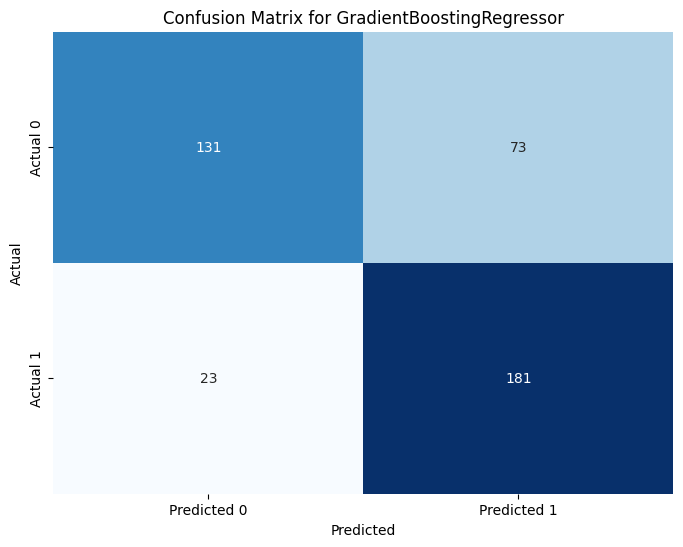

True Positives (TP): 181
True Negatives (TN): 131
False Positives (FP): 73
False Negatives (FN): 23


In [28]:


from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Use the best model from hyperparameter tuning

y_pred = best_model.predict(X_test)

# This threshold is crucial for the confusion matrix.
threshold = np.median(y_test) # Example: Use median of y_test

# Convert predictions and actual values to binary classes
y_pred_binary = (y_pred > threshold).astype(int)
y_test_binary = (y_test > threshold).astype(int)


# Calculate and display the confusion matrix
cm = confusion_matrix(y_test_binary, y_pred_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for GradientBoostingRegressor')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Extract values from the confusion matrix
tn, fp, fn, tp = cm.ravel()

print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")

In [29]:
import pickle

In [30]:
from joblib import dump

with open("model.pkl", "rb") as f:
    model = pickle.load(f)
dump(model, "model_new.pkl")


['model_new.pkl']